<a href="https://colab.research.google.com/github/IgorBaratta/simple_fem/blob/master/demo/Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/IgorBaratta/simple_fem.git

  Cloning https://github.com/IgorBaratta/simple_fem.git to /tmp/pip-req-build-2xvof3wt
  Running command git clone -q https://github.com/IgorBaratta/simple_fem.git /tmp/pip-req-build-2xvof3wt
  Created wheel for simple-fem: filename=simple_fem-0.0.1-cp36-none-any.whl size=7865 sha256=4f6aa3f5bd5c952881d5cdc70958b22dda5c934e5d627ae2c2c6311f678d0fb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-pkqb4r4j/wheels/a0/3c/66/421b6fef79aac10a362d22188aa620555275993d23291afad8
Successfully built simple-fem


Problem definition:

$$- \nabla^2 u = f \quad \text{in} \quad \Omega $$
$$   u = 0 \quad \text{in} \quad \partial \Omega $$

---


Where $\Omega:= (0, 1) \times (0, 1)$ and $f = 4 (-y^2 + y ) sin (\pi x)$


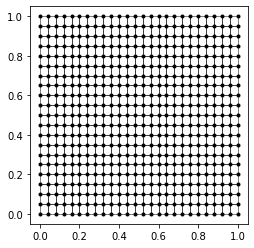

In [2]:
import numpy
from simple_fem import *
from scipy.sparse.linalg import spsolve
from simple_fem.assemble import assemble_matrix, assemble_vector, apply_bc

# define computational domain - Unit Square
mesh = Mesh(25, 20)
plot(mesh)

The problem can be rewritten using the finite element framework. 

Find $u_h \in Q$ such that:

$$\int_\Omega \nabla u_h \cdot \nabla v = \int fv $$

We first define the discrete function space:


In [3]:
# Define element and function space
element = Q1Element()
Q = FunctionSpace(mesh, element)

print("Number of dofs per element: ", element.num_dofs)

Number of dofs:  4


The source term $f = 4 (-y^2 + y ) sin (\pi x)$ can be represented by a lambda function. To assemble the linear form $$b_i = \int_{\Omega} f \hat{\phi}_i$$ we then call `assemble_vector`:


In [0]:
f = lambda x : 4*(-x[1]**2 + x[1])*numpy.sin(numpy.pi*x[0])
b = assemble_vector(Q, f)

Likewise we can assemble the bilinear form $$A_{ij} = \int_\Omega \nabla \phi_j \cdot \nabla \phi_i \, dx$$

by calling the `assemble_matrix` function with the `matrix_type` set to "stiffness":


In [0]:
A = assemble_matrix(Q, matrix_type="stiffness")

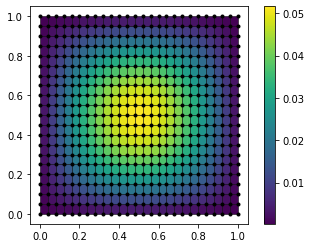

In [6]:
# Finally we can apply Dirichlet boundary conditions
# and call a sparse linear solver from scipy, for example spsolve:

dofs = Q.locate_boundary_dofs()
apply_bc(A, b, dofs, value=0)
x = spsolve(A, b)

plot(mesh, x)